## WEB APIs AND CLASSIFICATION-3


### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, roc_auc_score
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import seaborn as sns



%matplotlib inline

### Reading the csv file

In [2]:
df = pd.read_csv('final_df.csv')

In [3]:
df.head()

,title,selftext,label,clean_title,clean_selftext,clean_title_lemmat,clean_selftext_lemmat,clean_title_porter,clean_selftext_porter
0,Join our Discord server!,"Hey guys! r/diet is undergoing a refresh, and ...",0,join discord server,hey guys r diet undergoing refresh order grow ...,join discord server,hey guy r diet undergoing refresh order grow c...,join discord server,hey guy r diet undergo refresh order grow comm...
1,These sattvic foods are amazing to gain streng...,These sattvic foods are amazing to gain streng...,0,sattvic foods amazing gain strength endurance ...,sattvic foods amazing gain strength endurance ...,sattvic food amazing gain strength endurance m...,sattvic food amazing gain strength endurance m...,sattvic food amaz gain strength endur must rig...,sattvic food amaz gain strength endur must rig...
2,You don’t need to eliminate gluten from your d...,The times you want to avoid gluten are when yo...,0,need eliminate gluten diet unless medical cond...,times want avoid gluten celiac food sensitivit...,need eliminate gluten diet unless medical cond...,time want avoid gluten celiac food sensitivity...,need elimin gluten diet unless medic condit al...,time want avoid gluten celiac food sensit glut...
3,How to lose the rest of my belly fat,I’ve been dieting for months now and working o...,0,lose rest belly fat,dieting months working 5 times week lost 40 po...,lose rest belly fat,dieting month working 5 time week lost 40 poun...,lose rest belli fat,diet month work 5 time week lost 40 pound feel...
4,Can someone explain my curent 'diet' plan? ful...,Backstory: I have been trying to lose weight f...,0,someone explain curent diet plan full story,backstory trying lose weight time gotten overw...,someone explain curent diet plan full story,backstory trying lose weight time gotten overw...,someon explain curent diet plan full stori,backstori tri lose weight time gotten overweig...


In [4]:
# Checking dataframe shape
df.shape

(1900, 9)

In [5]:
# Checking for null values
df.isnull().sum().sum()

0

In [6]:
# Checking column names
df.columns

Index(['title', 'selftext', 'label', 'clean_title', 'clean_selftext',
       'clean_title_lemmat', 'clean_selftext_lemmat', 'clean_title_porter',
       'clean_selftext_porter'],
      dtype='object')

In [7]:
# checking the null values and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1900 entries, 0 to 1903
Data columns (total 9 columns):
title                    1900 non-null object
selftext                 1900 non-null object
label                    1900 non-null int64
clean_title              1900 non-null object
clean_selftext           1900 non-null object
clean_title_lemmat       1900 non-null object
clean_selftext_lemmat    1900 non-null object
clean_title_porter       1900 non-null object
clean_selftext_porter    1900 non-null object
dtypes: int64(1), object(8)
memory usage: 148.4+ KB


## Model Prep
----
Let's set up our data for modelling:

I am trying to fit the model on clean_selftext_lemmat as these  column has most of the data which is 
preprocessed  and lemmatized. I have ignored the rest of the columns as clean_selftext_lemmat is doing my job to classify the subreddits

### Splitting the dataframe (df) into two dataframes as( train _df) and (test_df)

Here we are spliiting the dataframe so that we train the data using the data from train_df and then test it by predicting and checkingthe score of the model using test_df.

In [8]:
train_df,test_df = train_test_split(df, shuffle = True, random_state = 42 )


I will keep my feature as clean_selftext_lemmat and model the data
1. Using CountVectorizer
    -Logistic Regression
    -Naive Bayes
2. TF-IDF
    -Logistic Regression
    -Naive Bayes

In [9]:
X = train_df['clean_selftext_lemmat']
y = train_df['label']

In [10]:
# checking the shape of train_df
train_df.shape

(1425, 9)

In [11]:
# checking the shape of test_df
test_df.shape

(475, 9)

In [12]:
# Splitting the train_df to train and test
X_train, X_val, y_train, y_val = train_test_split( X,y, stratify = y, random_state = 42)

### Pipeline
_______
Our pipeline will consist of two stages:
1. An instance of CountVectorizer
2. A Logistic Regression instance

Pipelines are used to help automate workflow as in our case,the countVectorizer will be creating vectors that have dimensionality to the size of our vocabulary followed by logistic regression to model dependent variable by calling the fit() function in order to learn a vaocabulary from one or more documents.

In [13]:
# we are using stop words such as diet and exercise.
pipe = Pipeline([('cvec', CountVectorizer(stop_words=['diet','exercise'])),
                ('lr', LogisticRegression())
                ])

### GridSearchCV using Logistic Regression
By doing gridsearch we will know the optimal hyperparameter settings, the set that results in the best model evaluation.
we want to know the optimal hyperparameter settings, the set that results in the best model evaluation.
Gridsearching uses cross-validation internally to evaluate the performance of each set of hyperparameters.

In [14]:
pipe_params = {
    
    'cvec__max_features': [2500, 3000, 3500],
    'cvec__min_df': [2,3],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1),(1,2)]
}
gs = GridSearchCV(pipe, param_grid = pipe_params, cv = 5)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

C:\Users\sapna\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8679775280898876


{'cvec__max_df': 0.9,
 'cvec__max_features': 2500,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2)}

In [15]:
gs.score(X_train, y_train)

0.9897003745318352

In [16]:
gs.score(X_val, y_val)

0.8431372549019608

In [17]:
#Checking proba
gs.predict_proba(X_val)[1][1]

7.728263690850169e-08

In [18]:
# Let's create a dataframe called pred_df that contains:
# 1. The list of true values of our test set.
# 2. The list of predicted probabilities based on our model


pred_proba = [i[1] for i in gs.predict_proba(X_val)]

pred_df = pd.DataFrame({'true_values' :y_val,
                       'pred_probs' :pred_proba})
pred_df.head(5)

,true_values,pred_probs
705,0,1.907693e-08
56,0,7.728264e-08
394,0,3.464386e-01
793,0,4.540155e-03
1758,1,9.554003e-01


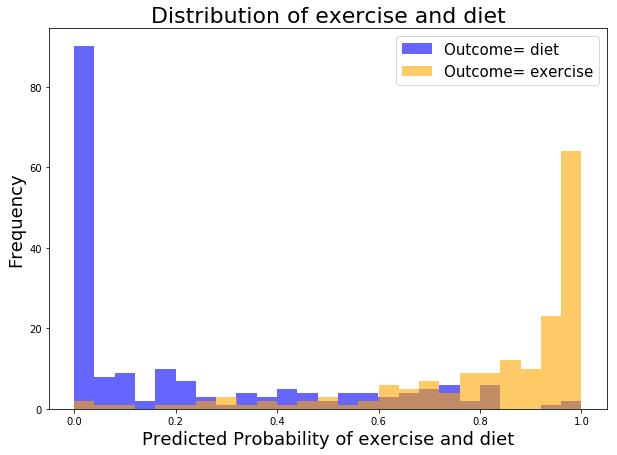

In [19]:
# Create Figure
plt.figure(figsize = (10,7))

# Create histogram of Observations
plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins = 25,
        color ='b',
        alpha = 0.6,
        label = 'Outcome= diet')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins = 25,
        color ='orange',
        alpha = 0.6,
        label = 'Outcome= exercise')

# Label axes
plt.title('Distribution of exercise and diet', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability of exercise and diet', fontsize=18)

# Create Legend
plt.legend(fontsize = 15);

In [20]:
#Finds true positive rate
def TPR(df, true_col, pred_prob_col, threshold):
   true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
   false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
   return true_positive / (true_positive + false_negative)

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
   true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
   false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
   return 1 - (true_negative / (true_negative + false_positive))

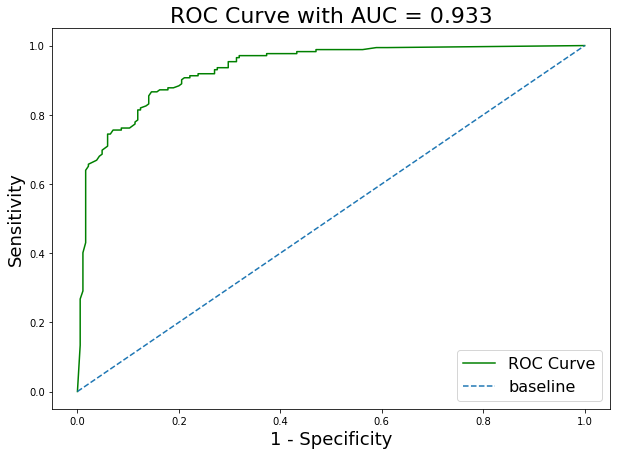

In [21]:
# Create figure.
plt.figure(figsize = (10,7))
# Create threshold values.
thresholds = np.linspace(0, 1, 200)
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
        tpr_values, # True Positive Rate on Y-axis
        label='ROC Curve', color = 'g')
# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
        np.linspace(0, 1, 200),
        label='baseline',
        linestyle='--')
#plots lines to connect graph to origin and 1,1 - the graph appears awkward otherwise.

#Calculate AUC score to output in 'return' tuple and print on graph
auc_score = round(roc_auc_score(pred_df["true_values"], pred_df["pred_probs"]),3)
# Label axes.
plt.title(f'ROC Curve with AUC = {auc_score}', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)
# Create legend.
plt.legend(fontsize=16);

### GridSearchCV using Naive Bayes
We are doing gridsearch on Naive Bayes which is another classification algorithm which assumes that a particular feature in a class is unrelated to the presence of another value.

### Pipeline
_______
Our pipeline will consist of two stages:
1. An instance of CountVectorizer
2. Naive Bayes instance

In [22]:
# Instantiating CountVectorizer and multinomial Naive Bayes
pipe = Pipeline([('cvec', CountVectorizer(stop_words=['diet','exercise'])),
                ('nb', MultinomialNB())
                ])

Since the word count in countvectorizer gives out different number of counts, we need to use multinomial Naive Baes than the rest.

In [23]:
# checking for best hyperparameters using gridsearch
pipe_params = {
    
    'cvec__max_features': [2500, 3000, 3500],
    'cvec__min_df': [2,3],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1),(1,2)]
}
gs = GridSearchCV(pipe, param_grid = pipe_params, cv = 10)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.9026217228464419


{'cvec__max_df': 0.9,
 'cvec__max_features': 2500,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 1)}

In [24]:
#Checking score on train data
gs.score(X_train, y_train)

0.9447565543071161

In [25]:
# checking score on test data
gs.score(X_val, y_val)

0.876750700280112

In [26]:
#Checking proba
gs.predict_proba(X_val)[1][1]

1.8962957960895437e-36

In [27]:
# Let's create a dataframe called pred_df that contains:
# 1. The list of true values of our test set.
# 2. The list of predicted probabilities based on our model


pred_proba = [i[1] for i in gs.predict_proba(X_val)]

pred_df = pd.DataFrame({'true_values' :y_val,
                       'pred_probs' :pred_proba})
pred_df.head(5)

,true_values,pred_probs
705,0,1.283843e-30
56,0,1.896296e-36
394,0,7.122355e-09
793,0,2.255970e-02
1758,1,9.999995e-01


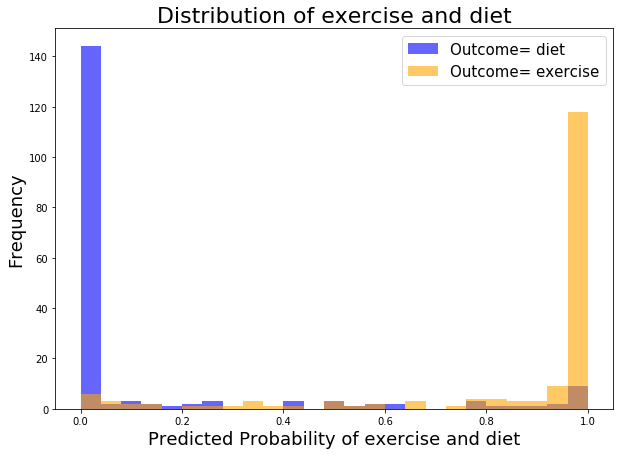

In [28]:
# Create Figure
plt.figure(figsize = (10,7))

# Create histogram of Observations
plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins = 25,
        color ='b',
        alpha = 0.6,
        label = 'Outcome= diet')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins = 25,
        color ='orange',
        alpha = 0.6,
        label = 'Outcome= exercise')

# Label axes
plt.title('Distribution of exercise and diet', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability of exercise and diet', fontsize=18)

# Create Legend
plt.legend(fontsize = 15);

In [29]:
#Finds true positive rate
def TPR(df, true_col, pred_prob_col, threshold):
   true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
   false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
   return true_positive / (true_positive + false_negative)

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
   true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
   false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
   return 1 - (true_negative / (true_negative + false_positive))

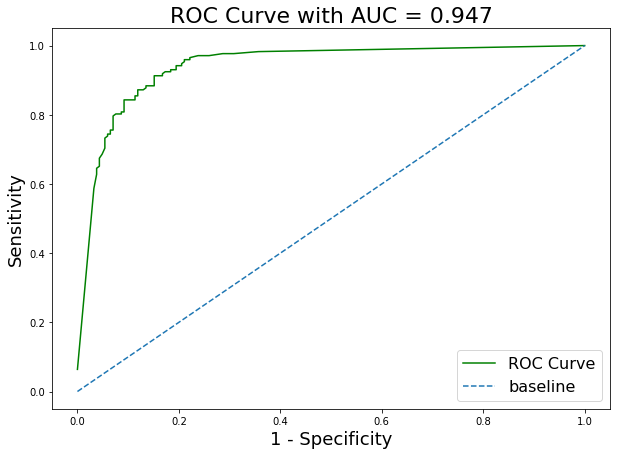

In [30]:
# Create figure.
plt.figure(figsize = (10,7))
# Create threshold values.
thresholds = np.linspace(0, 1, 200)
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
        tpr_values, # True Positive Rate on Y-axis
        label='ROC Curve', color = 'g')
# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
        np.linspace(0, 1, 200),
        label='baseline',
        linestyle='--')
#plots lines to connect graph to origin and 1,1 - the graph appears awkward otherwise.

#Calculate AUC score to output in 'return' tuple and print on graph
auc_score = round(roc_auc_score(pred_df["true_values"], pred_df["pred_probs"]),3)
# Label axes.
plt.title(f'ROC Curve with AUC = {auc_score}', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)
# Create legend.
plt.legend(fontsize=16);

### Modelling on clean_selftext_lemmat using TF-IDF

Term Frequency-Inverse Document Frequency is another common algorithm to transform text into meaningful representation of number.

So, we will transform text into numbers using TF-IDF and then do logistic regression and Multinomial Naive Bayes to predict the train and test data.

In [31]:
# Fit the transformer
tvec =TfidfVectorizer()

### Using Logistic Regression
in pipeline , tf-idf followed by logistic regression()

In [32]:
pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('lr', LogisticRegression())
])

In [33]:
# checking for best hyperparameters using logistic regression
pipe_params = {
    'tvec__max_features': [2500, 3000, 3500],
    'tvec__min_df': [2, 3],
    'tvec__max_df': [.9, .95],
    'tvec__ngram_range': [(1,1), (1,2)]
}
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=10)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

C:\Users\sapna\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9101123595505618


{'tvec__max_df': 0.9,
 'tvec__max_features': 3000,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 2)}

In [34]:
#Checking train data
gs.score(X_train, y_train)

0.9737827715355806

In [35]:
# checking on test data
gs.score(X_val, y_val)

0.927170868347339

In [36]:
#Checking proba
gs.predict_proba(X_val)[1][1]

0.11704682975314071

In [37]:
# Let's create a dataframe called pred_df that contains:
# 1. The list of true values of our test set.
# 2. The list of predicted probabilities based on our model


pred_proba = [i[1] for i in gs.predict_proba(X_val)]

pred_df = pd.DataFrame({'true_values' :y_val,
                       'pred_probs' :pred_proba})
pred_df.head(5)

,true_values,pred_probs
705,0,0.054364
56,0,0.117047
394,0,0.402164
793,0,0.244960
1758,1,0.805511


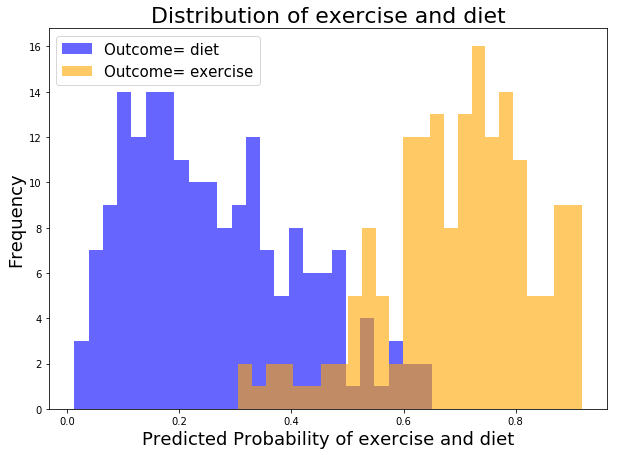

In [38]:
# Create Figure
plt.figure(figsize = (10,7))

# Create histogram of Observations
plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins = 25,
        color ='b',
        alpha = 0.6,
        label = 'Outcome= diet')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins = 25,
        color ='orange',
        alpha = 0.6,
        label = 'Outcome= exercise')

# Label axes
plt.title('Distribution of exercise and diet', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability of exercise and diet', fontsize=18)

# Create Legend
plt.legend(fontsize = 15);

In [39]:
#Finds true positive rate
def TPR(df, true_col, pred_prob_col, threshold):
   true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
   false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
   return true_positive / (true_positive + false_negative)

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
   true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
   false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
   return 1 - (true_negative / (true_negative + false_positive))

## Creating ROC Curve

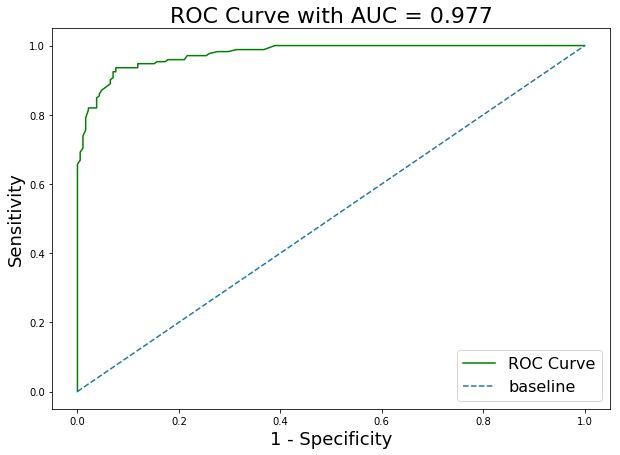

In [40]:
# Create figure.
plt.figure(figsize = (10,7))
# Create threshold values.
thresholds = np.linspace(0, 1, 200)
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
        tpr_values, # True Positive Rate on Y-axis
        label='ROC Curve', color = 'g')
# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
        np.linspace(0, 1, 200),
        label='baseline',
        linestyle='--')
#plots lines to connect graph to origin and 1,1 - the graph appears awkward otherwise.

#Calculate AUC score to output in 'return' tuple and print on graph
auc_score = round(roc_auc_score(pred_df["true_values"], pred_df["pred_probs"]),3)
# Label axes.
plt.title(f'ROC Curve with AUC = {auc_score}', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)
# Create legend.
plt.legend(fontsize=16);

We can see the ROC Curve is pretty well with AUC = 0.974
AUC provides an aggregate measure of performance across all possible classification thresholds

### Using Naives Bayes
In Pipeline, tf-idf followed by multinomial NB

In [41]:
pipe = Pipeline([('tvec', TfidfVectorizer(stop_words=['diet','exercise'])),
                ('nb', MultinomialNB())
                ])

In [42]:
pipe_params = {
    
    'tvec__max_features': [2500, 3000, 3500],
    'tvec__min_df': [2,3],
    'tvec__max_df': [.9, .95],
    'tvec__ngram_range': [(1,1),(1,2)]
}
gs = GridSearchCV(pipe, param_grid = pipe_params, cv = 10)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.8941947565543071


{'tvec__max_df': 0.9,
 'tvec__max_features': 3000,
 'tvec__min_df': 3,
 'tvec__ngram_range': (1, 2)}

In [43]:
gs.score(X_train, y_train)

0.9597378277153558

In [44]:
gs.score(X_val, y_val)

0.8683473389355743

In [45]:
pred_proba = [i[1] for i in gs.predict_proba(X_val)]

pred_df = pd.DataFrame({'true_values' :y_val,
                       'pred_probs' :pred_proba})
pred_df.head(5)

,true_values,pred_probs
705,0,0.014443
56,0,0.172729
394,0,0.145079
793,0,0.234004
1758,1,0.952241


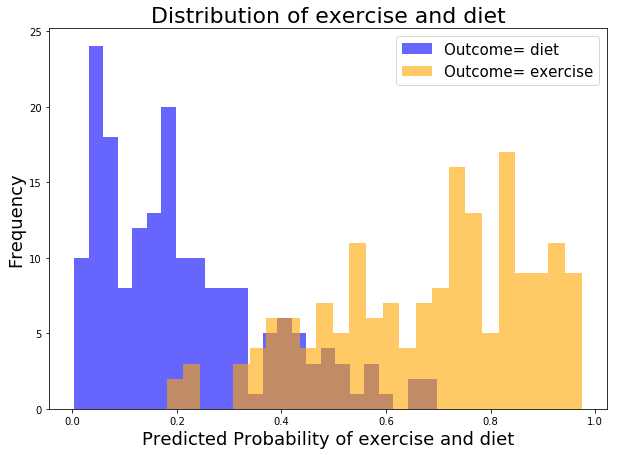

In [46]:
# Create Figure
plt.figure(figsize = (10,7))

# Create histogram of Observations
plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins = 25,
        color ='b',
        alpha = 0.6,
        label = 'Outcome= diet')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins = 25,
        color ='orange',
        alpha = 0.6,
        label = 'Outcome= exercise')

# Label axes
plt.title('Distribution of exercise and diet', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability of exercise and diet', fontsize=18)

# Create Legend
plt.legend(fontsize = 15);

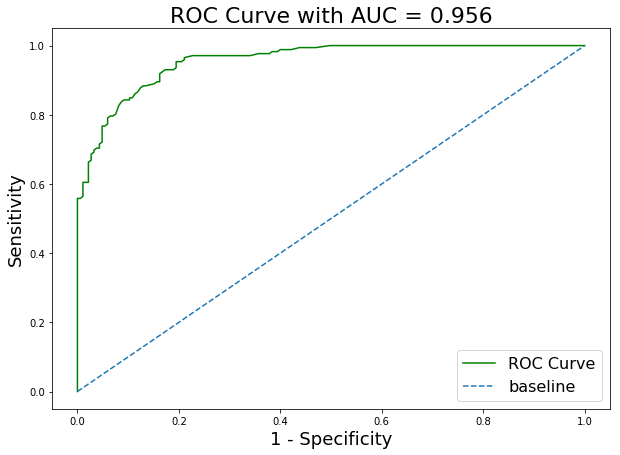

In [47]:
# Create figure.
plt.figure(figsize = (10,7))
# Create threshold values.
thresholds = np.linspace(0, 1, 200)
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
        tpr_values, # True Positive Rate on Y-axis
        label='ROC Curve', color = 'g')
# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
        np.linspace(0, 1, 200),
        label='baseline',
        linestyle='--')
#plots lines to connect graph to origin and 1,1 - the graph appears awkward otherwise.

#Calculate AUC score to output in 'return' tuple and print on graph
auc_score = round(roc_auc_score(pred_df["true_values"], pred_df["pred_probs"]),3)
# Label axes.
plt.title(f'ROC Curve with AUC = {auc_score}', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)
# Create legend.
plt.legend(fontsize=16);

 ### Insights :
 
 ON selftext_lemmat column
 1. CountVectorizer
     Logistic Regression Score : 84.31%
     AUC : o.933
     Naive Bayes Score : 87.67%
     AUC : 0.947
 
 2. TF-IDF
     Logistic Regression Score : 92.71%
     AUC:0.977
     Naive Bayes Score :86.83%
     AUC:0.956
     
     From the above data, I can infer that the score and AUC score of TF-IDF, Logistic Regression is doing better, I will use the optimal parameters of the same.
     
     'tvec__max_df': 0.9,
     'tvec__max_features': 3000,
     'tvec__min_df': 2,
     'tvec__ngram_range': (1, 2)}
 
  

## Predictions on test data
we will check the score on our test data.

In [48]:
X_test = test_df['clean_selftext_lemmat']
y_test= test_df['label']

In [49]:
X_test.head()

1225    recently put together ultimate library bicep w...
111     got different answer google one even said need...
557     provide essential foodgroups eat everyday mega...
529     lose weight quite simple eat le eating calorie...
1313    started work past 3 week definitely gotten res...
Name: clean_selftext_lemmat, dtype: object

In [50]:
X_test.shape

(475,)

In [51]:
y_test.shape

(475,)

### Instantiating Tf-idf using optimal hyperparameters

In [52]:
tvec = TfidfVectorizer(stop_words=['diet','exercise'],max_df= 0.9, max_features= 3000, min_df= 2, ngram_range =(1, 2))

                

In [53]:
lr = LogisticRegression()

In [54]:
X_train_tvec = tvec.fit_transform(X_train)

In [55]:

model_2 = lr.fit(X_train_tvec,y_train)


                         

C:\Users\sapna\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [56]:
X_test_tvec = tvec.transform(X_test)

In [57]:
# Generate our predictions
predictions = model_2.predict(X_test_tvec)


In [58]:
# Score our model on the testing data
test_score = model_2.score(X_test_tvec, y_test)
test_score

0.8947368421052632

Our trained model is predicting well test data with 89.47% .

We can improve the score by scrapping more posts and by tuning more hyper parameters.


## Confusion Matrix

It's an error matrix that allows visualisation of the performance of a supervised algorithm. So, let's see the performance of our model.

In [59]:
cm= confusion_matrix(y_test, predictions)
cm

array([[220,  27],
       [ 23, 205]], dtype=int64)

In [60]:
# changing to dataframe to see in more nicer way
cm_df = pd.DataFrame(cm, columns=['pred diet(tn)', 'pred exercise(tp)'], index=['actual diet(fn)', 'actual exercise(fp)'])
cm_df


,pred diet(tn),pred exercise(tp)
actual diet(fn),220,27
actual exercise(fp),23,205


We can see from above data that the model predicted diet(tn) more than predicted exercise(tp) and there are some errors too.
Let's see the specificity and sensitivity of our model

In [61]:
# Save TN/FP/FN/TP values
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

In [62]:
# What is the specifity of our test?
spec = tn / (tn + fp)
print(f' Specificity: {round(spec ,4)}')

 Specificity: 0.8907


Specificity  relates for the ability to identify negative results. Likwise our model predicted to be exercise and actually it is also exercise. We can see the specificity of our model is 89.07.%

In [63]:
# What is the sensitivity of our test?
sens = tp / (tp + fn)
print(f' Sensitivity: {round(sens,4)}')

 Sensitivity: 0.8991


Sensitivity : It's same with emotions, you pick up on the feeling of others. 
and likewise our model predicted it diet and actually it is diet. 
We have 89.91% sensitvity which is a good value.
From these we can infer that the model has some errors too where in it predicted to be exercise but actually it is diet and viceversa too. 
There is some overlapping.

In [64]:
#let's look at mis-classified posts
# Create DataFrame with column for predicted values.
results = pd.DataFrame(predictions, columns=['predicted'])
results.head()
# Create column for observed values.
results['actual'] = y_test.values
results['index'] = y_test.index
results['clean_selftext_lemmat'] = X_test.values
# Find rows where the predicted label and the actual label is different
results[results['predicted'] != results['actual']]

,predicted,actual,index,clean_selftext_lemmat
0,0,1,1225,recently put together ultimate library bicep w...
14,1,0,196,dietitian debunks popular movie tv show diet
34,0,1,1710,calorie counter gym lie
41,1,0,919,begin hello im mark im bit fatass im trying ch...
44,0,1,1579,working getting bmi fat metabolism rather carb...
46,1,0,413,still want work every day run 10km wondering e...
62,1,0,384,nothing say expect know good 1 week diet get s...
70,0,1,1661,4ft 9inches weighing 148lbs 37lbs since little...
72,1,0,237,aspartame break digestion bad
82,1,0,276,reached 88kg jogging getting change


## Sentiment Analysis

In [65]:
#from textblob import TextBlob

In [66]:
#df['polarity'] = df['clean_selftext_lemmat'].map(lambda text: TextBlob(text).sentiment.polarity)

In [67]:
#df.columns

In [68]:
#df.groupby('label')['polarity'].count()

TextBlob is a python library for processing textual data.
The sentiment function of textblob returns two properties, polarity and subjectivity. 
Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.

In [69]:
#import cufflinks as cf
#cf.go_offline()
#cf.set_config_file(offline = False, world_readable = True)

The polarity object is a pandas.series object which does not have a iplot method when not linked to plotly. We need cufflinks to link plotly to pandas and add the iplot method.
If we don't have cufflinks get it with : pip install cufflinks --upgrade

In [70]:
#df['polarity'].iplot(kind = 'hist', bins = 50, xTitle = 'polarity',
                    # linecolor = 'black', yTitle='count', title = 'Sentiment Polarity Distribution')

## Insights:
From the above plot, we can infer that the vast majority of sentiment polarity scores are equal to zero which infers that most post are with neutral sentiment and also there are sentiment scores greater than zero which means most of them are pretty positive.

In [71]:
word_list = tvec.get_feature_names()
count_list = X_train_tvec.toarray().sum(axis = 0)
word_count_dict = (dict(zip(word_list, count_list)))

train_df_vocab = pd.DataFrame(list(word_count_dict.items()), columns = (['word', 'count'])).sort_values('word', ascending = True)
TrainData_top_30 = train_df_vocab.sort_values('count', ascending = False).head(30)



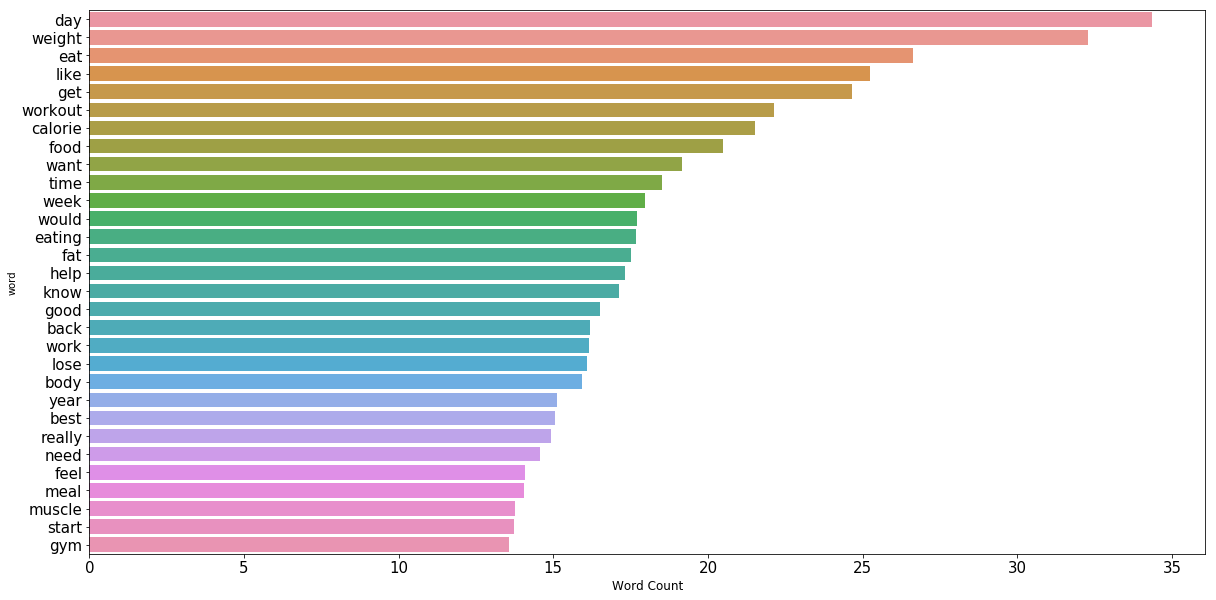

In [72]:
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'count', y = 'word', data = TrainData_top_30)
ax.set_xlabel("Word Count", fontsize = 12)
ax.tick_params(labelsize = 15)

From the above plot we can see people talk more on diet than exercise.
Thanks to healthline.com where they stated that eating a well balanced diet can help you get the calories and nutrients you need to fuel your daily activites, including regular exercise. 
So, we will conclude this project by saying that
## EAT RIGHT TYPE OF FOOD AT THE RIGHT TIMES OF THE DAY

## Recommendation:

Eat right type of food at the right time of the day 

## Improvement
By scrapping more post, the score could be improved

## Data Science solution: 
Our model was able to classify two subreddits very efficiently.